<a href="https://colab.research.google.com/github/edusgr/EDP-1/blob/main/Integral%20de%20fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-35-4088415731>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


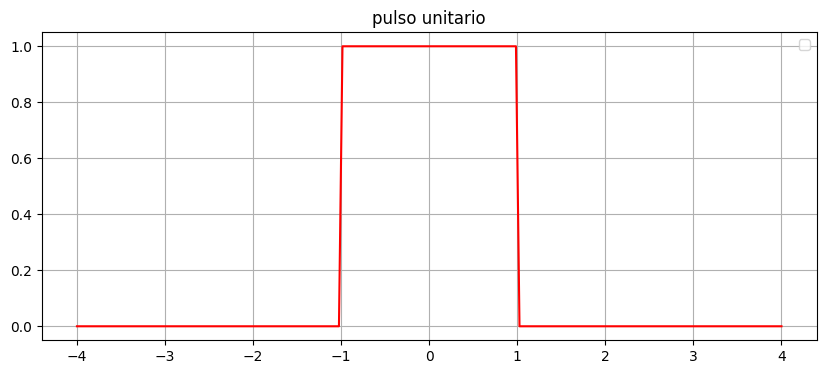

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# A
def f_original(x):
    return np.where(np.abs(x) <= 1, 1, 0)

x_vals = np.linspace(-4, 4, 200)
f_vals = f_original(x_vals)

plt.figure(figsize=(10, 4))
plt.plot(x_vals, f_vals, color='red')
plt.title('pulso unitario')

plt.grid()
plt.legend()
plt.show()





Calculando reconstrucción numérica con a = 20...


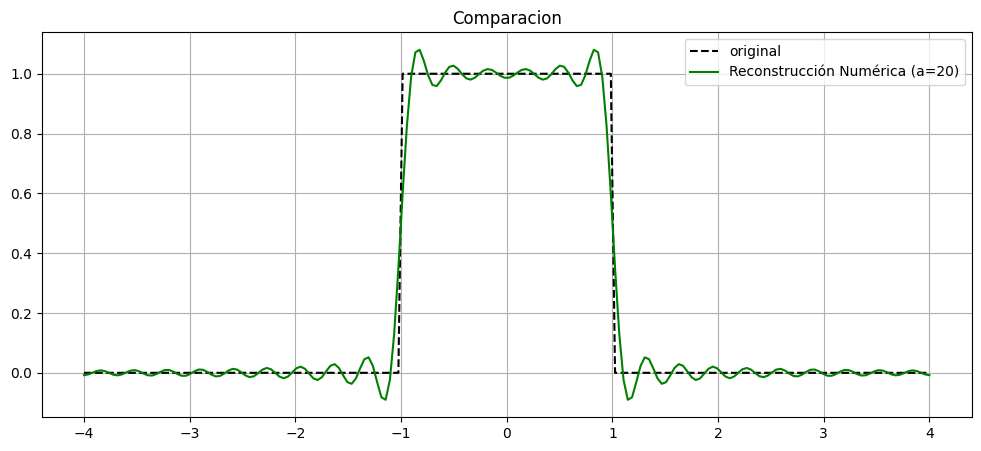

In [36]:
# B
def f_original(x):
    return np.where(np.abs(x) <= 1, 1, 0)

def F_w(w):
    return 2 * np.sinc(w / np.pi)

# Invers
def inverse_fourier(x_val, a_val):
    integrand = lambda w: np.real(F_w(w) * np.exp(1j * w * x_val))
    result, _ = quad(integrand, -a_val, a_val, limit=200)
    return result / (2 * np.pi)

x_vals = np.linspace(-4, 4, 200)
f_vals = f_original(x_vals)

a_val = 20
print(f"Calculando reconstrucción numérica con a = {a_val}...")
f_rec_vals = np.array([inverse_fourier(xi, a_val) for xi in x_vals])

# comparación
plt.figure(figsize=(12, 5))
plt.plot(x_vals, f_vals, label='original', color='black', linestyle='--')
plt.plot(x_vals, f_rec_vals, label=f'Reconstrucción Numérica (a={a_val})', color='green')
plt.title('Comparacion')

plt.grid()
plt.legend()
plt.show()


Calculando reconstrucción para a = 8...
Calculando reconstrucción para a = 16...
Calculando reconstrucción para a = 32...


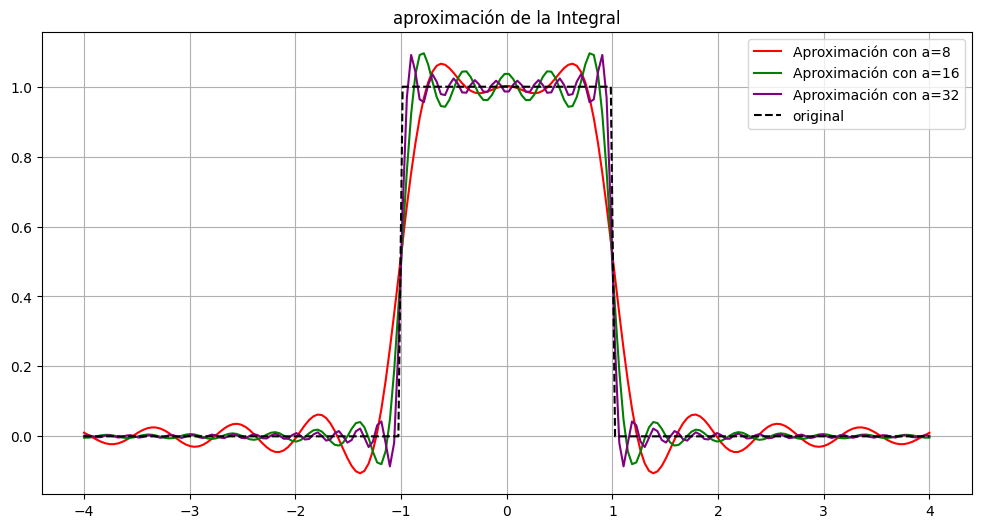

In [37]:
def F_w(w):
    return 2 * np.sinc(w / np.pi)

def inverse_fourier(x_val, a_val):
    integrand = lambda w: np.real(F_w(w) * np.exp(1j * w * x_val))
    result, _ = quad(integrand, -a_val, a_val, limit=200)
    return result / (2 * np.pi)

# C
a_values = [8, 16, 32]
colors = ['red', 'green', 'purple']

plt.figure(figsize=(12, 6))
for a_val, color in zip(a_values, colors):
    print(f'Calculando reconstrucción para a = {a_val}...')
    f_rec_vals = np.array([inverse_fourier(xi, a_val) for xi in x_vals])
    plt.plot(x_vals, f_rec_vals, label=f'Aproximación con a={a_val}', color=color)

# Graficar la función original
plt.plot(x_vals, f_vals, label='original', color='black', linestyle='--')
plt.title('aproximación de la Integral')
plt.grid()
plt.legend()
plt.show()
